In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset and EDA

In [2]:
df = pd.read_csv('Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
name             8128 non-null object
year             8128 non-null int64
selling_price    8128 non-null int64
km_driven        8128 non-null int64
fuel             8128 non-null object
seller_type      8128 non-null object
transmission     8128 non-null object
owner            8128 non-null object
mileage          7907 non-null object
engine           7907 non-null object
max_power        7913 non-null object
torque           7906 non-null object
seats            7907 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
df.dropna(axis = 0, inplace = True)  #since we have enough data we can remove na values

In [8]:
print(df.shape, '\n', df.isnull().sum())

(7906, 13) 
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


In [9]:
df['Car_age'] = 2021 - df['year'] # A derived variable from the data given which may be important

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [11]:
df.describe()

,year,selling_price,km_driven,seats,Car_age
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,7.016064
std,3.863695,8.135827e+05,5.679230e+04,0.959208,3.863695
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,1.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,4.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,6.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,9.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,27.000000


## Data Cleaning

In [12]:
Features = df.drop(columns = ['name', 'year','torque']) #Dropping columns that are not required

In [13]:
Features.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,14


In [14]:
#Correcting the data types of some features

Features['mileage'] = Features['mileage'].replace(to_replace = 'kmpl|km/kg', value = '', regex = True).astype('float')

Features['engine'] = Features['engine'].replace('CC', '', regex = True).astype('int')

Features['max_power'] = Features['max_power'].replace('bhp', '',regex = True).astype('float')

Features.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power        float64
seats            float64
Car_age            int64
dtype: object

## Data Visualization

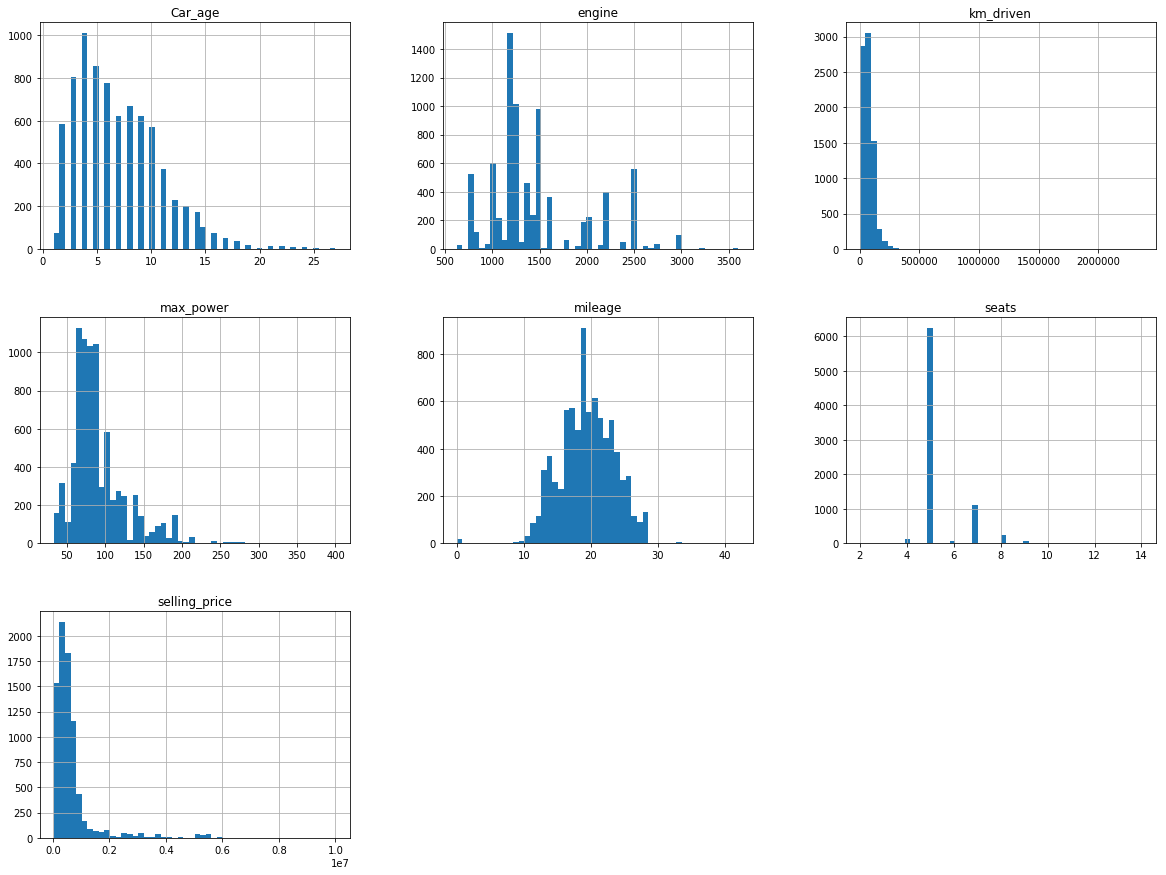

In [15]:
histograms = Features.hist(bins = 50, figsize = (20,15))

([<matplotlib.patches.Wedge at 0x225a5fc3b00>,
 [Text(-0.528795,0.96456,'First Owner'),
  Text(0.25426,-1.07021,'Second Owner'),
  Text(1.03929,-0.360388,'Third Owner'),
  Text(1.09749,-0.0742514,'Fourth & Above Owner'),
  Text(1.1,-0.00218556,'Test Drive Car')],
 [Text(-0.288434,0.526124,'66.0%'),
  Text(0.138687,-0.583751,'25.5%'),
  Text(0.566885,-0.196575,'6.5%'),
  Text(0.598632,-0.0405008,'2.0%'),
  Text(0.599999,-0.00119213,'0.1%')])

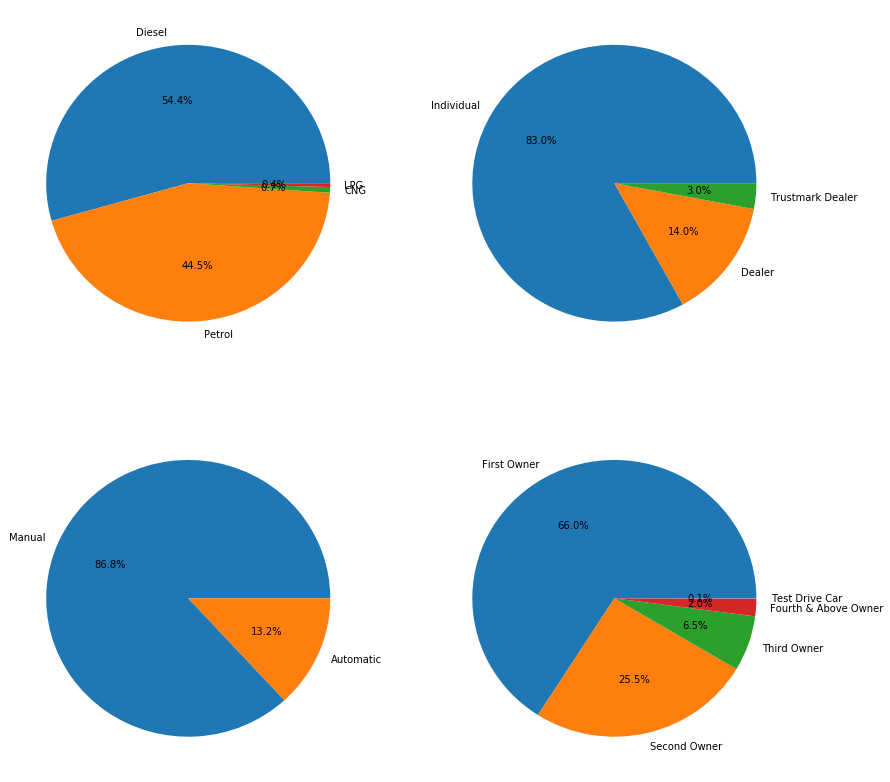

In [16]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize = (14,14))

labels = Features['fuel'].value_counts().index.tolist()
values = Features['fuel'].value_counts().tolist()
ax1.pie(values, labels = labels, autopct = '%1.1f%%')

labels = Features['seller_type'].value_counts().index.tolist()
values = Features['seller_type'].value_counts().tolist()
ax2.pie(values, labels = labels, autopct = '%1.1f%%')

labels = Features['transmission'].value_counts().index.tolist()
values = Features['transmission'].value_counts().tolist()
ax3.pie(values, labels = labels, autopct = '%1.1f%%')

labels = Features['owner'].value_counts().index.tolist()
values = Features['owner'].value_counts().tolist()
ax4.pie(values, labels = labels, autopct = '%1.1f%%')

## Handling Categorical Variables

In [17]:
Features = pd.get_dummies(Features, drop_first = True)

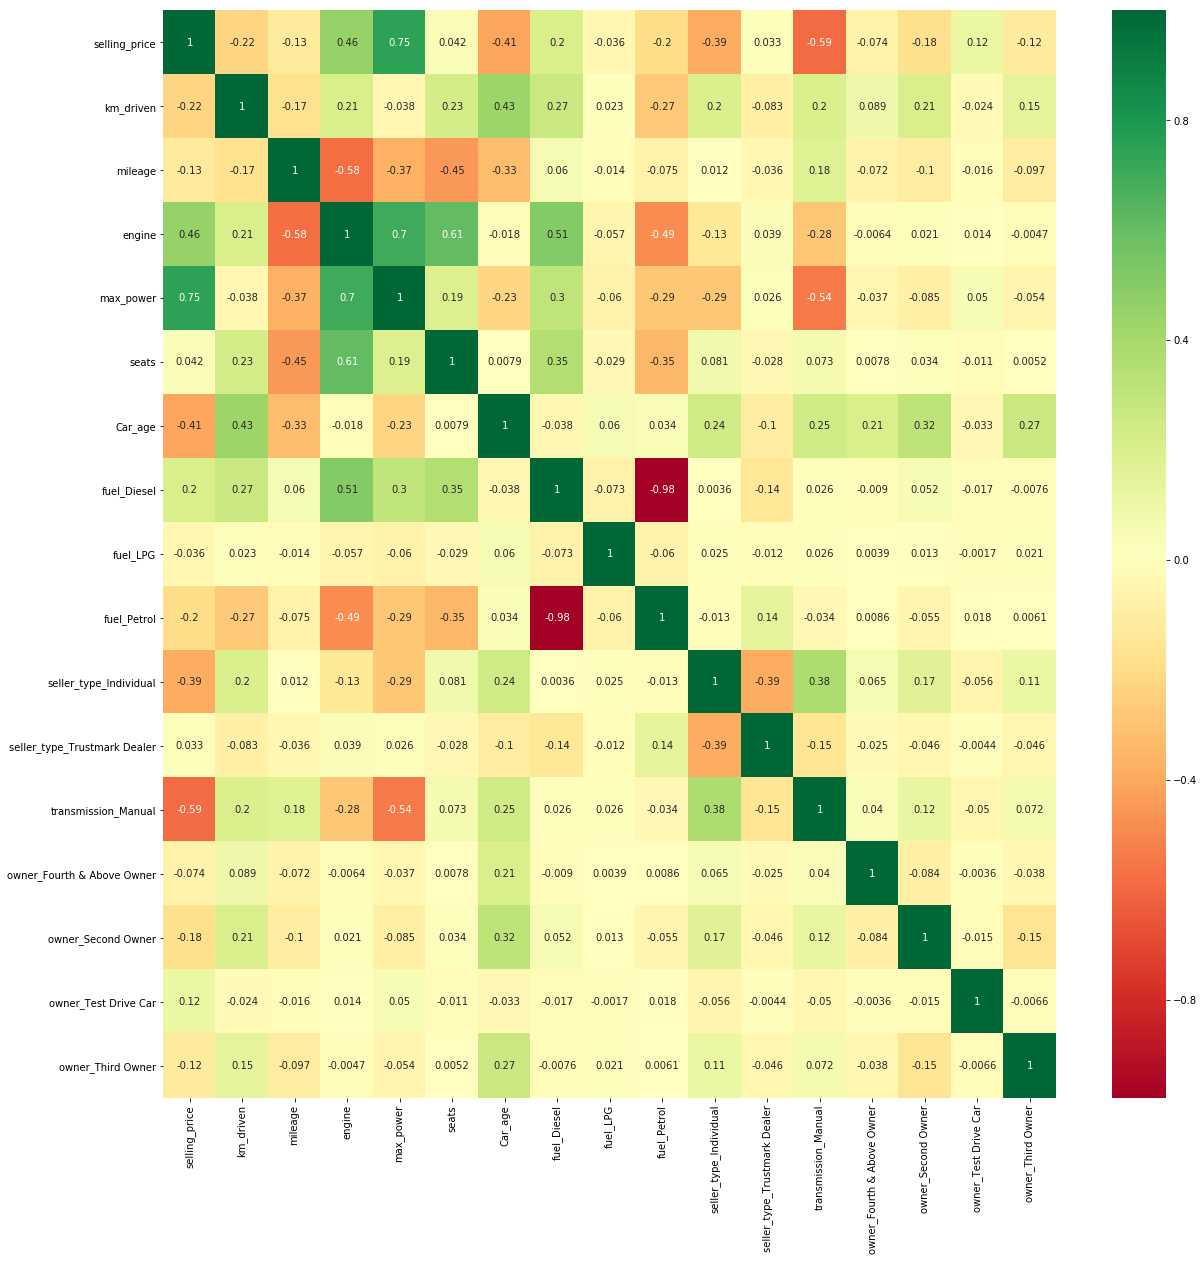

In [18]:
corr = Features.corr()
corr_features = corr.index
plt.figure(figsize = (20,20))

gg = sns.heatmap(Features[corr_features].corr().fillna(0.0), annot = True, cmap = 'RdYlGn')

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X = Features.drop('selling_price', axis = 1)
y = Features['selling_price']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [20]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((5534, 16), (2372, 16), (5534,), (2372,))

# Random Forest Regressor Model And Hyperparameter Tuning using Randomized Search CV

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

C:\Users\YashBajpai13\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5,30,6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [23]:
randomgrid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth' : max_depth,
              'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = randomgrid, scoring = 'r2'
                              , n_iter = 10, cv = 5, verbose = 2, n_jobs = 1)

In [25]:
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5, total=   3.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5, total=   3.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5, total=   3.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5, total=   3.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=5, total=   3.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.6s
[CV] n_estimators=900, min_samples_spli

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=800, min_samples_split=5,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=2)

In [26]:
yhat = rf_random.predict(xtest)

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest, yhat)

0.9558120091084166

C:\Users\YashBajpai13\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


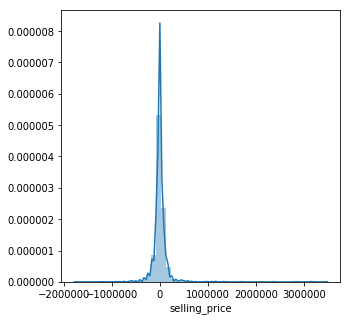

In [28]:
plt.figure(figsize = (5,5))
sns.distplot(ytest - yhat)

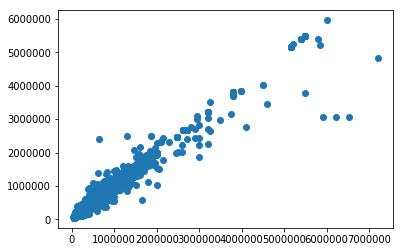

In [29]:
plt.scatter(ytest, yhat)